# Pyfilaments exploratory data analysis notebook

In [27]:
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook

In [47]:
# Load data
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
folder, *rest = os.path.split(file)

print(folder)

filament = analysis.analysisTools(file = file)





/home/deepak/LacryModelling_Local/SimulationData/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
3
Loading Simulation data from disk ...
Time step: 9.99990000099999
No:of particles : 32
No:of time points : 100001
Root path:  /home/deepak/LacryModelling_Local/SimulationData/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_00.hdf5


In [4]:
# Calculate the filament length vs time

filament.compute_arc_length()

<IPython.core.display.Javascript object>


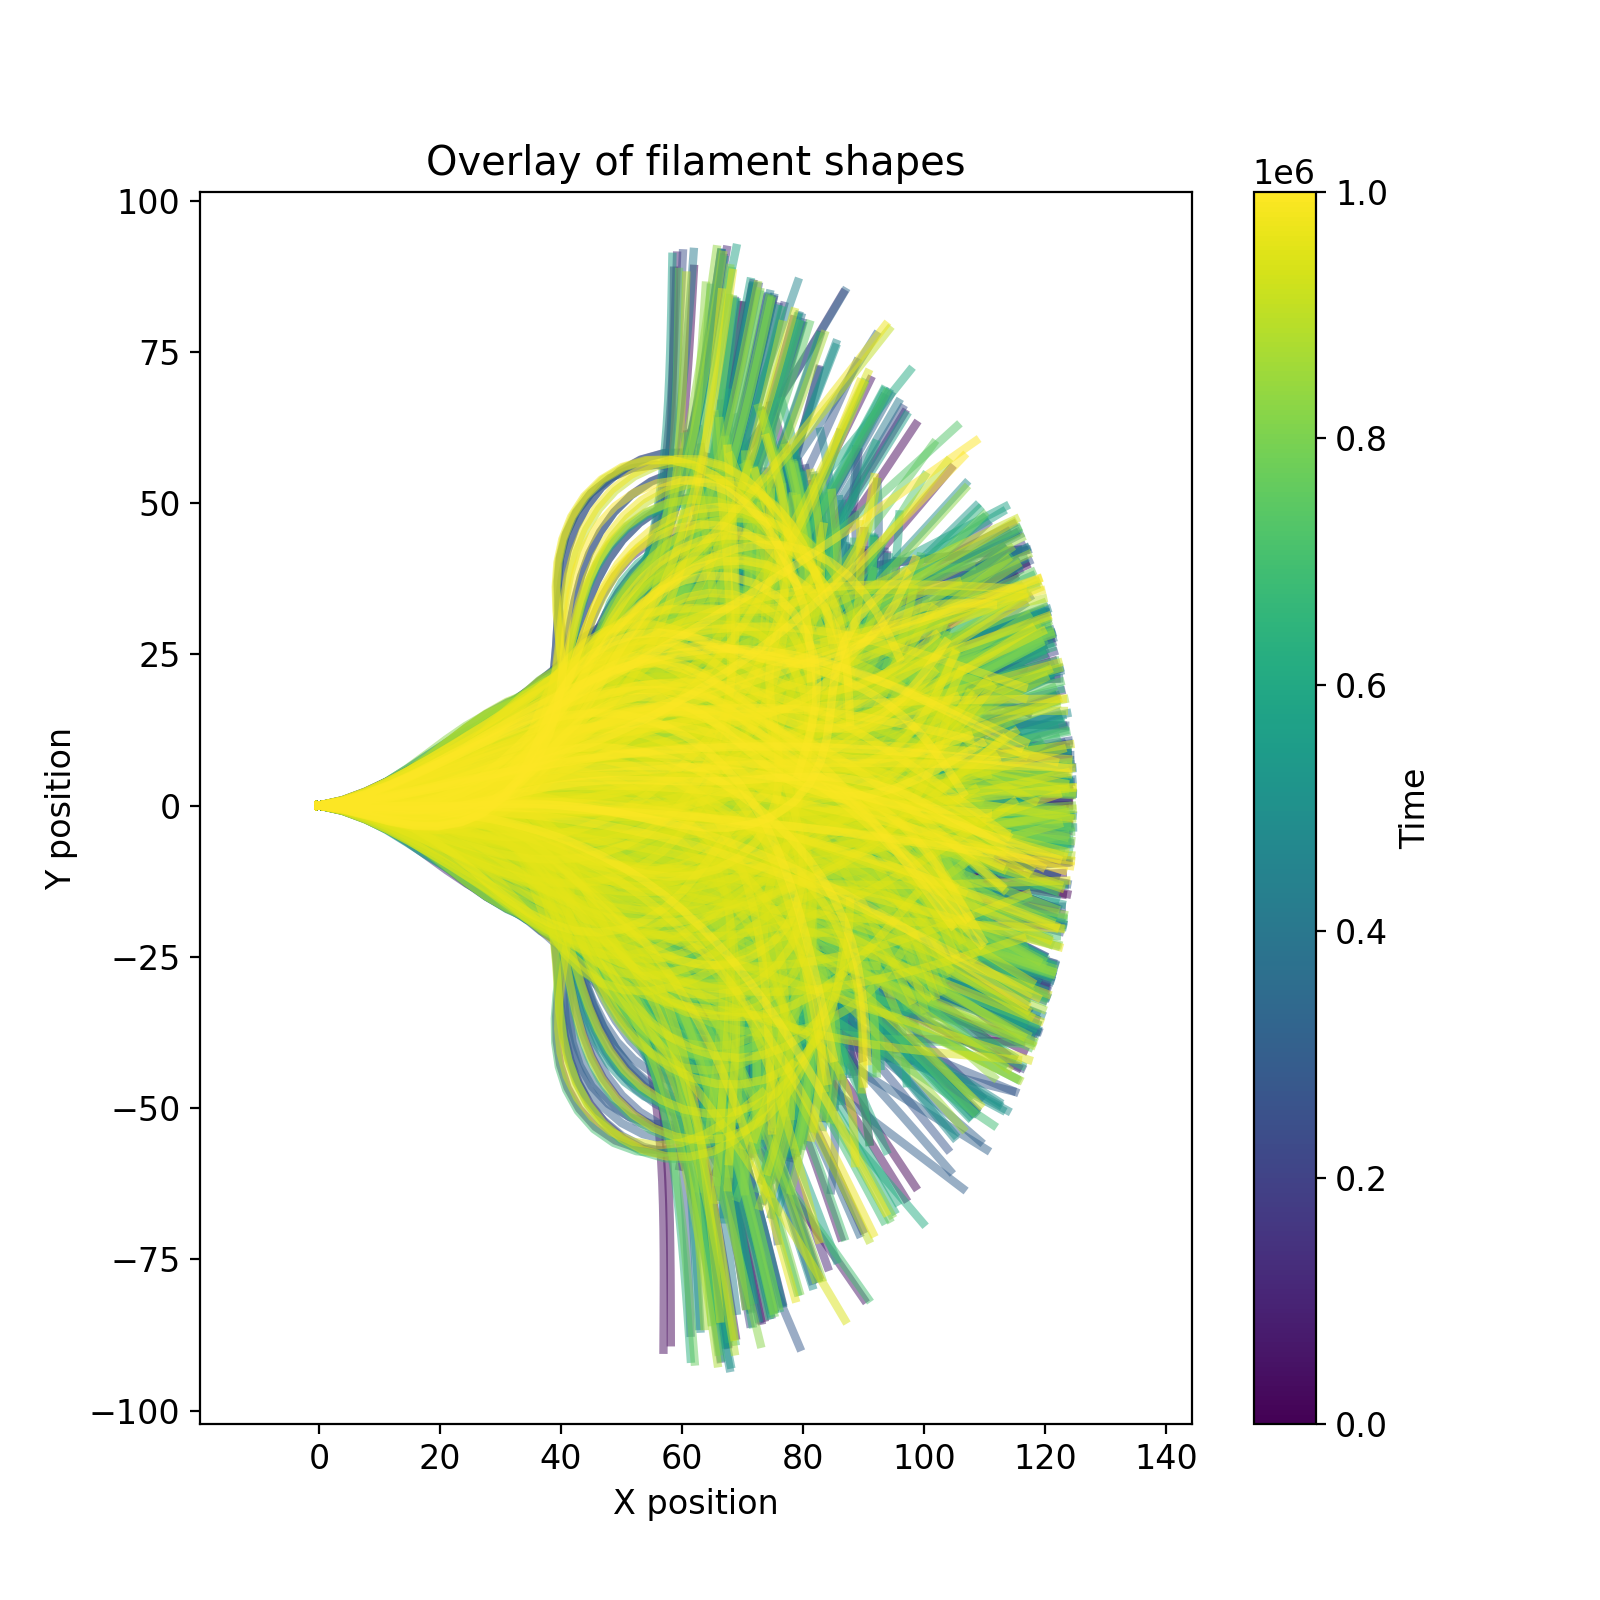

In [50]:
# Overlay of filament shapes
filament.plot_filament_centerlines(stride = 50, save = True)

# Tip search-coverage and unique locations sampled


Total unique positions sampled by tip: 1392.0
Total hits : 100001


<IPython.core.display.Javascript object>


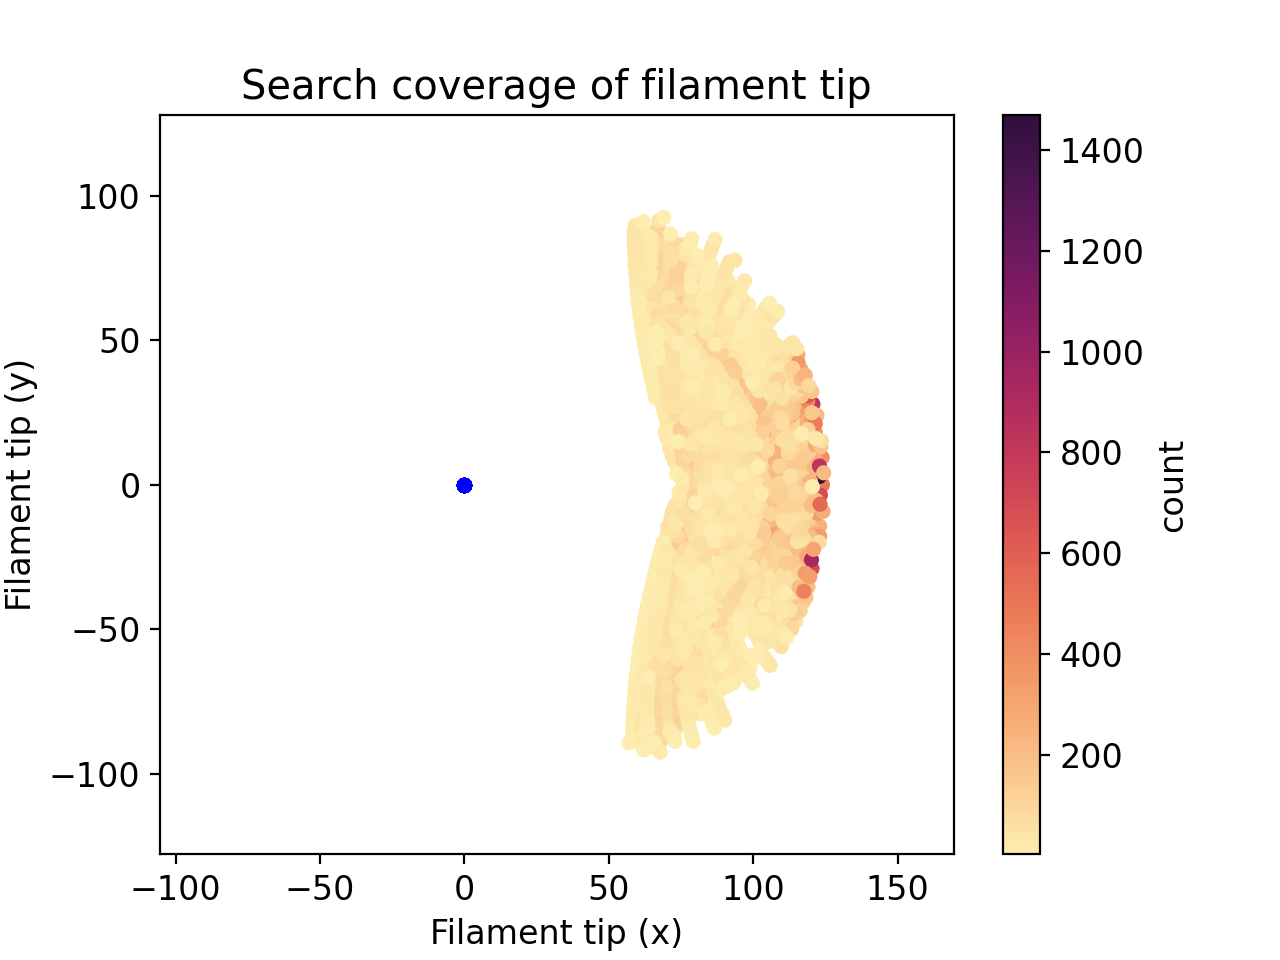

1


<IPython.core.display.Javascript object>


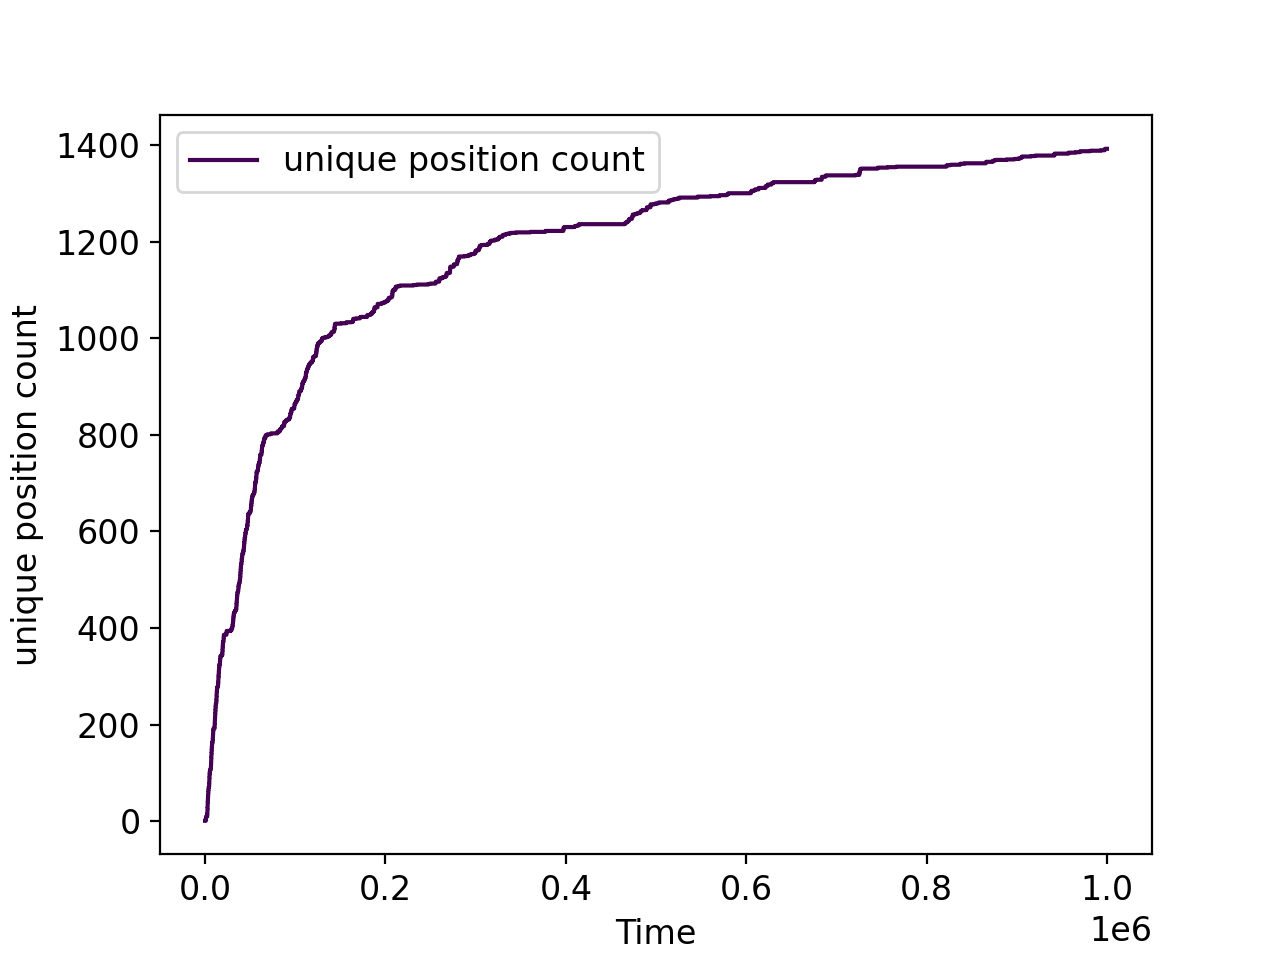

In [49]:

filament.filament_tip_coverage(save = False)

filament.plot_unique_tip_locations(save = False)

filament.plot_timeseries(var = ['unique position count'])

# Unique positions sampled (prelim results)

- k = 30, Total unique positions sampled by tip: 257.0
- k = 40, Total unique positions sampled by tip: 211.0
- k = 50, Total unique positions sampled by tip: 436.0
- k = 70, Total unique positions sampled by tip: 1423.0
- k = 100, Total unique positions sampled by tip: 460.0